# Netflix Data Analysis
The following analysis addresses the following questions related to Netflix's content library:
###  Which countries have the most content available on Netflix?
### what is the Distribution of Content Types (TV Shows and Movies) on Netflix?
### Trend in the Release of Content Over the Years?
### Distribution of Ratings on Netflix?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#load a dataset
df = pd.read_csv('netflix.csv')

## DATA ASSESSMENT

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
#get the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.shape

(8807, 12)

In [7]:
df.size

105684

In [8]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [17]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [11]:
df.duplicated().sum()

0

In [13]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [31]:
release_years = df['release_year']

# Consistency Check
# Check if all release years are within a reasonable range based on descriptive statistics
min_year = 1925
max_year = 2021
consistent_data = release_years.between(min_year, max_year).all()

# Validity Check
# Ensure all release years are positive integers
valid_data = (release_years >= 0) & (release_years.astype(int) == release_years)

# Print the results
print(f"Consistency Check Result: {consistent_data}")
print(f"Validity Check Result: {valid_data.all()}")

Consistency Check Result: True
Validity Check Result: True


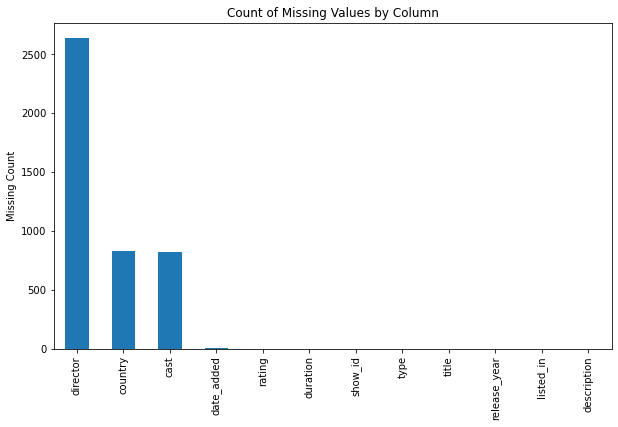

In [14]:

# Assuming your DataFrame is named 'df'
missing_count = df.isnull().sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
missing_count.plot(kind='bar')
plt.title('Count of Missing Values by Column')
plt.ylabel('Missing Count')
plt.show()


## CLEANING DATA

In [18]:
# make a copy of the data
copy_df = df.copy()

In [19]:
copy_df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [20]:
copy_df['director'].fillna('Unknown',inplace=True)
copy_df['cast'].fillna('Unknown',inplace=True)
copy_df['country'].fillna('Unknown',inplace=True)



In [22]:
copy_df.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [27]:

copy_df.dropna(inplace=True)

In [28]:
copy_df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

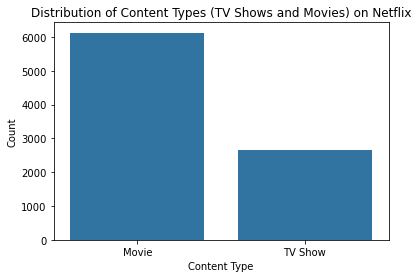

In [34]:

# Create a countplot to visualize the distribution of content types
sns.countplot(data=copy_df, x='type', color='tab:blue')

# Adding labels and title
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.title("Distribution of Content Types (TV Shows and Movies) on Netflix")

# Show the plot
plt.show()


In [40]:
# Q Which countries have the most content available on Netflix?

# Group the data by the "country" column and count the titles
country_content = copy_df['country'].value_counts()

#display top 10
top_10 = country_content.head(10)

print(top_10)

United States     2809
India              972
Unknown            829
United Kingdom     418
Japan              243
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: country, dtype: int64


In [41]:
top_10.index

Index(['United States', 'India', 'Unknown', 'United Kingdom', 'Japan',
       'South Korea', 'Canada', 'Spain', 'France', 'Mexico'],
      dtype='object')

In [42]:
top_10.values

array([2809,  972,  829,  418,  243,  199,  181,  145,  124,  110],
      dtype=int64)

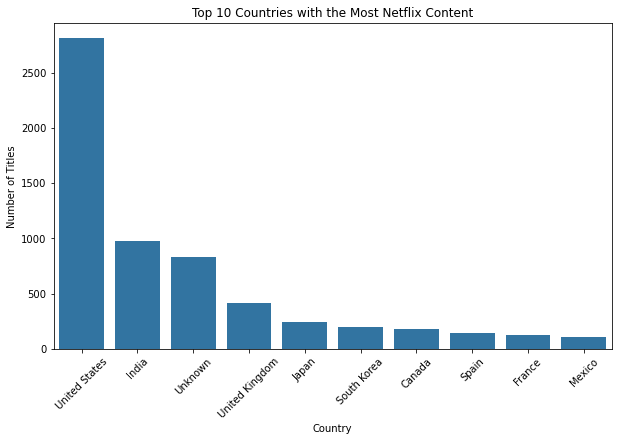

In [45]:
# Visualize the top countries with a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10.index, y=top_10.values, color='tab:blue')
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.title("Top 10 Countries with the Most Netflix Content")
plt.xticks(rotation=45)
plt.show()

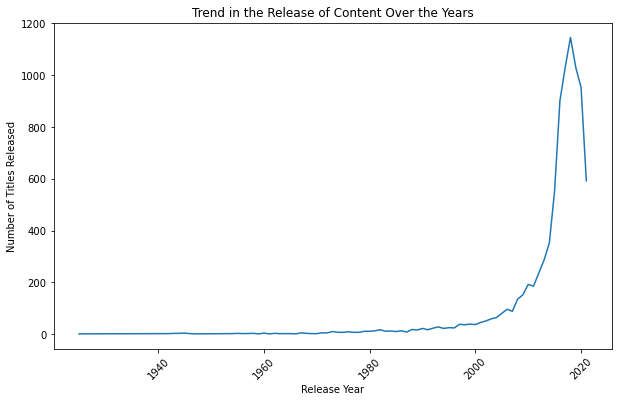

In [77]:

# Group the data by "release_year" and count the number of titles for each year
content_by_year = copy_df['release_year'].value_counts().sort_index()

# Create a line plot to show the trend in content release over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x=content_by_year.index, y=content_by_year.values, color='tab:blue')
plt.xlabel("Release Year")
plt.ylabel("Number of Titles Released")
plt.title("Trend in the Release of Content Over the Years")
plt.xticks(rotation=45)
plt.show()


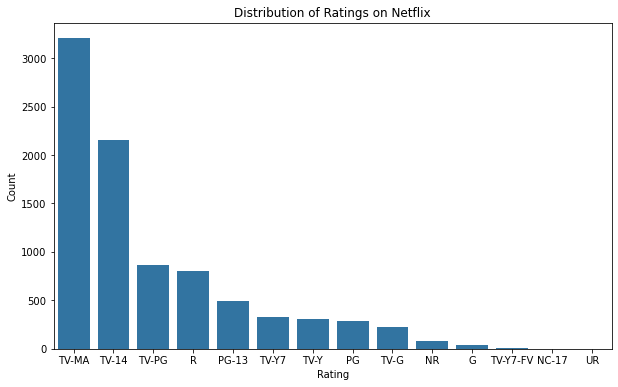

In [71]:
#Q What are the most common ratings for content on Netflix?
plt.figure(figsize=(10,6))
#Count the occurrences of each rating 
rating_order =copy_df['rating'].value_counts()
sns.countplot(data=copy_df, x = 'rating',color='tab:blue',order=rating_order.index);
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings on Netflix");


<AxesSubplot:xlabel='type', ylabel='rating'>

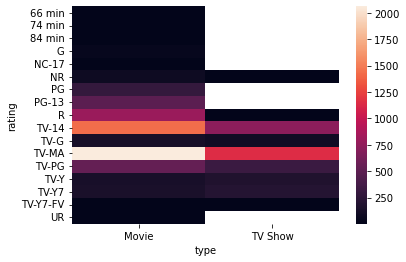

In [100]:
#Q: What are the top-rated movies and TV shows on Netflix based on user ratings?
ct_counts = df.groupby(['type', 'rating']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='rating', columns='type', values='count')
sns.heatmap(ct_counts);
